# Homework 3

## Q1

The *Gibbs sampler* in class for the prior $p(\theta,\tau) \propto 1$ was created by alternatingly sampling from the *full conditional* $p(\theta|\tau,\textbf{x})$ *normal* and  $p(\tau|\theta,\textbf{x})$ *gamma* distributions. Create this *Gibbs sampler* so your code can be used for the sample `x = stats.norm(loc=m, scale=s).rvs(size=n)` for any arbitrary `n`, `m`, and `s`.

*Use the code below or your own code to <u>provide a demonstration of Bayesian inference<u> for this data and model specification.*

## Answer to Q1

### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Choose n, m, and s 

In [3]:
# Choose choices of n, m, s
n = 30
m = 0
s = 1

### Run Simulation

In [4]:
x = stats.norm(loc=m, scale=s).rvs(size=n)

C,G = 2,10000  # chains, Gibbs samples

theta,tau = np.zeros([C,G]),np.zeros([C,G])

theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        # https://en.wikipedia.org/wiki/Gamma_distribution
        tau[c,g] = stats.gamma(a = (n/2) + 1, scale= 2/((x-theta[c, g-1])**2).sum()).rvs() 
        theta[c,g] = stats.norm(x.mean(), scale = 1/(tau[c,g]*n)**0.5).rvs() 

### Plotting

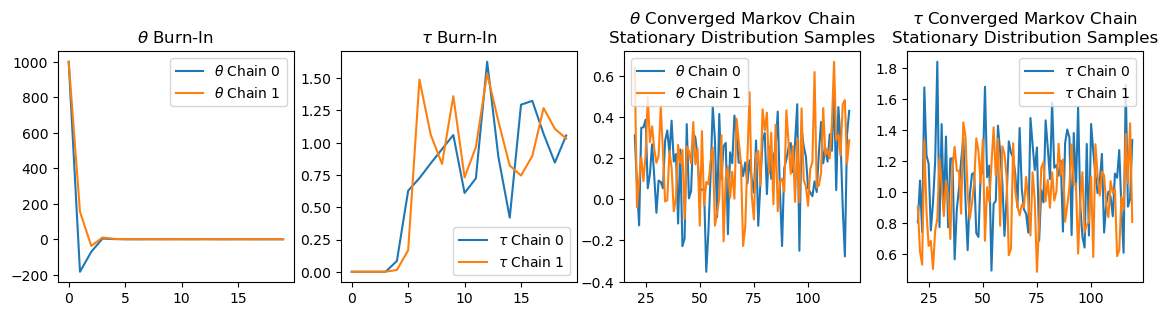

In [5]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

### Bayesian Inference

Therefore, the 95% credible interval and inference for $\theta$ is the following:

In [6]:
print(np.quantile(theta[0,burn:], [0.025, 0.975]))

[-0.20621562  0.51903285]


The inference and 95% credible interval for $\tau$ is the following:

In [7]:
print(np.quantile(tau[0,burn:], [0.025,0.975]))

[0.5975422  1.65204298]


## Q2

Derive the *full conditional distributions* $p(\tau|\theta, \mathbf{x})$ and $p(\theta|\tau, \mathbf{x})$ if $p(\theta)$ is $N(\theta_0, \tau_0)$ and $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$. 

*Explain how to equate $\alpha$ and $\lambda$ with controlling the amount and nature of information the prior contributes to the posterior. How can we interpret these as controlling a "number of data points" contributed by the prior relative to the number of data points contributed to the posterior through the likelihoood?*

Create an updated version of the *Gibbs sampler* for $N(\theta_0, \tau_0)$ and $\textrm{gamma}(\textrm{shape}=\frac{\alpha}{2}, \textrm{rate}=\frac{\lambda}{2})$ priors for $p(\theta)$ and $p(\tau)$ respectively. 

*Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.*


## Answer to Q2

### Deriving posterior conditional distributions

The other distributions needed can be found in lecture notes and are the following: <br>

1. $p(\theta) = N(\theta_0, \tau_0) = \sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}$ 

2. $p(\tau) \propto \tau^{\frac{\alpha}{2}-1} e^{- \frac{\lambda}{2} \tau}$

3. $f(\mathbf{x}|\theta, \tau) = \prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}(x_i-\theta)^2}$

Calculating $p(\tau|\theta, \mathbf{x})$ gives us the following result:

$
\begin{align*}
p(\tau|\theta, \mathbf{x}) &\propto{} f(\mathbf{x}|\theta)p(\tau)\\
&\propto{} \prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}(x_i-\theta)^2} \times \tau^{\frac{\alpha}{2} - 1} e^{-\frac{\lambda}{2}\tau} \\
& \propto {} \left(\frac{\tau}{2 \pi}\right)^\frac{n}{2} e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i-\theta)^2} \times \tau^{\frac{\alpha}{2} - 1} e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2} \\
&\propto{} \tau^{\frac{n + \alpha}{2} - 1}  e^{ -\frac{\tau}{2} \left(\sum_{i=1}^n (x_i-\theta)^2 + \lambda \right)} \\
&\propto{} \tau^{\frac{n + \alpha}{2} - 1}  e^{-\tau \left(\frac{\sum_{i=1}^n (x_i-\theta)^2 + \lambda}{2}\right)} \\
\end{align*}
$

Therefore, $p(\tau|\theta, \mathbf{x})$ ~ $Gamma\left(\frac{n + \alpha}{2}, \frac{\sum_{i=1}^n (x_i-\theta)^2 + \lambda}{2}\right)$

From lecture notes, we obtain $p(\theta|\tau, \mathbf{x})$:

$
\begin{align*}
p(\theta|\tau, \mathbf{x}) &\propto{} f(\mathbf{x}|\theta)p(\theta)\\
&\propto{} \prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}(x_i-\theta)^2} \times \sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2} \\
&\propto{} e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i-\theta)^2} \times e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2} \\
&\propto{} e^{-\frac{\tau}{2}  \sum_{i=1}^n (x_i-\theta)^2} e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto{} e^{-\frac{\tau}{2}  \sum_{i=1}^n\theta^2 -2\theta x_i} e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto{} e^{-\frac{\tau}{2} n\theta^2 -2\theta \sum_{i=1}^n x_i} e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto{} e^{-\frac{\tau n}{2} \left( \theta^2 -2\theta \bar x \right)} e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto{} e^{-\frac{1}{2} [ ( \tau n\theta^2 - 2  \tau n\bar x \theta) + (\tau_0 \theta^2-2\tau_0\theta\theta_0)  ] }\\
& = {} e^{-\frac{1}{2} [ \theta^2 (\tau n+\tau_0) - 2 \theta (n\tau\bar x + \tau_0 \theta_0) ] }\\
& = {} e^{-\frac{1}{2} \frac{\tau n+\tau_0}{\tau n+\tau_0} [ \theta^2 (\tau n+\tau_0) - 2 \theta (n\tau\bar x + \tau_0 \theta_0) ] } \\
& = {} e^{-\frac{\tau n+\tau_0}{2}  \left[ \theta^2  - 2 \theta \left(\frac{n\tau\bar x + \tau_0 \theta_0}{\tau n+\tau_0}\right) \right] } \\
& = {} e^{-\frac{\tau n+\tau_0}{2}  \left[ \theta^2  - 2 \theta \left(\frac{n\bar x + \frac{\tau_0}{\tau} \theta_0}{ n+\frac{\tau_0}{\tau}}\right) \right] } \\
& = {} e^{-\frac{\tau n+\tau_0}{2}  \left[ \theta  - \left(\frac{n\bar x + \frac{\tau_0}{\tau} \theta_0}{ n+\frac{\tau_0}{\tau}}\right) \right]^2 } \\
\end{align*}
$

Therefore, $p(\theta|\tau, \mathbf{x})$ ~ $Normal\left(\frac{n\bar x + \frac{\tau_0}{\tau} \theta_0}{ n+\frac{\tau_0}{\tau}}, \frac{1}{\tau n + \tau_0}\right)$

### Explaining 𝛼 and 𝜆

$\alpha$ is known as the shape parameter and influences the overall shape of the distribution. $\lambda$ is called the rate parameter and is the inverse of the scale parameter. It influences how spread out the distribution is. A higher $\lambda$ generally leads to a more concentrated or "tighter" distribution. Both hyperparameters influence how much influence and thus "data points" the prior contributes towards the posterior distribution. For example, if $\alpha$ is higher, then the overall number of "data points" from the prior is increased. Since $n$ is the number of data points from the likelihood, increasing $\alpha$ such that it is much higher than $n$ would shift the posterior's main influence to the prior rather than the likelihood. If $\lambda$ is higher, then the data provided is more specific and also has a greater influence on the posterior distribution.

### Updated Gibbs Sampler

#### Initializing variables

In [8]:
n = 30  
m = 0   
s = 1   
x = stats.norm(loc=m, scale=s).rvs(size=n)  

# Hyperparameters for theta prior
theta_0 = 0  
tau_0 = 1   

# Hyperparameters for tau prior
alpha_prior = 2 
lambda_prior = 1  

C, G = 2, 10000  
theta = np.zeros([C, G])  
tau = np.zeros([C, G])   

theta[:, 0] = 1000 

#### Running Simulation

In [9]:
for c in range(C):
    for g in range(1, G):
        # update tau
        alpha_post = (alpha_prior + n) / 2
        beta_post = (lambda_prior + np.sum((x - theta[c, g - 1])**2)) / 2
        tau[c, g] = stats.gamma(a=alpha_post, scale=1 / beta_post).rvs()

        # update theta 
        tau_ratio = tau_0 / tau[c, g] 
        numerator = (n * x.mean()) + (tau_ratio * theta_0)
        denominator = n + tau_ratio

        mu_post = numerator / denominator  
        sigma_post = (1 / (n * tau[c, g] + tau_0))**0.5 

        theta[c, g] = stats.norm(loc=mu_post, scale=sigma_post).rvs()

#### Plotting

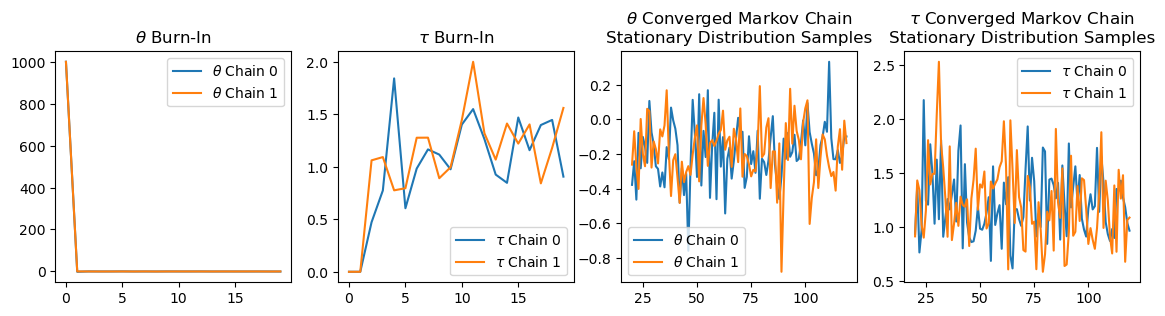

In [10]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 

### Demonstration of how Changing Hyperparameters Influences Posterior Distributions

#### Simulation

In [11]:
C, G = 1, 5000  # One chain, number of Gibbs samples

# create function to run Gibbs sampling over different priors
def gibbs_sampler(theta_0, tau_0, alpha_prior, lambda_prior):
    theta = np.zeros([C, G])  # Storage for theta samples
    tau = np.zeros([C, G])    # Storage for tau samples

    # initialize theta
    theta[:, 0] = x.mean() 

    # Gibbs sampling procedure
    for c in range(C):
        for g in range(1, G):
            # update tau
            alpha_post = (alpha_prior + n) / 2
            beta_post = (lambda_prior + np.sum((x - theta[c, g - 1])**2)) / 2
            tau[c, g] = stats.gamma(a=alpha_post, scale=1 / beta_post).rvs()

            # ipdate theta
            tau_ratio = tau_0 / tau[c, g] 
            numerator = (n * x.mean()) + (tau_ratio * theta_0)
            denominator = n + tau_ratio

            mu_post = numerator / denominator  
            sigma_post = (1 / (n * tau[c, g] + tau_0))**0.5  

            theta[c, g] = stats.norm(loc=mu_post, scale=sigma_post).rvs()

    return theta.flatten(), tau.flatten()

# use different priors to compare the effects of hyperparameter values on posterior distributions
priors = [
    {"theta_0": 0, "tau_0": 0.1, "alpha_prior": 1, "lambda_prior": 1},  
    {"theta_0": 5, "tau_0": 1, "alpha_prior": 2, "lambda_prior": 2},  
    {"theta_0": 10, "tau_0": 10, "alpha_prior": 5, "lambda_prior": 5},  
]

# run the Gibbs sampler for each prior
results = []
for prior in priors:
    theta_samples, tau_samples = gibbs_sampler(**prior)
    results.append({"prior": prior, "theta": theta_samples, "tau": tau_samples})

#### Visualizing Results

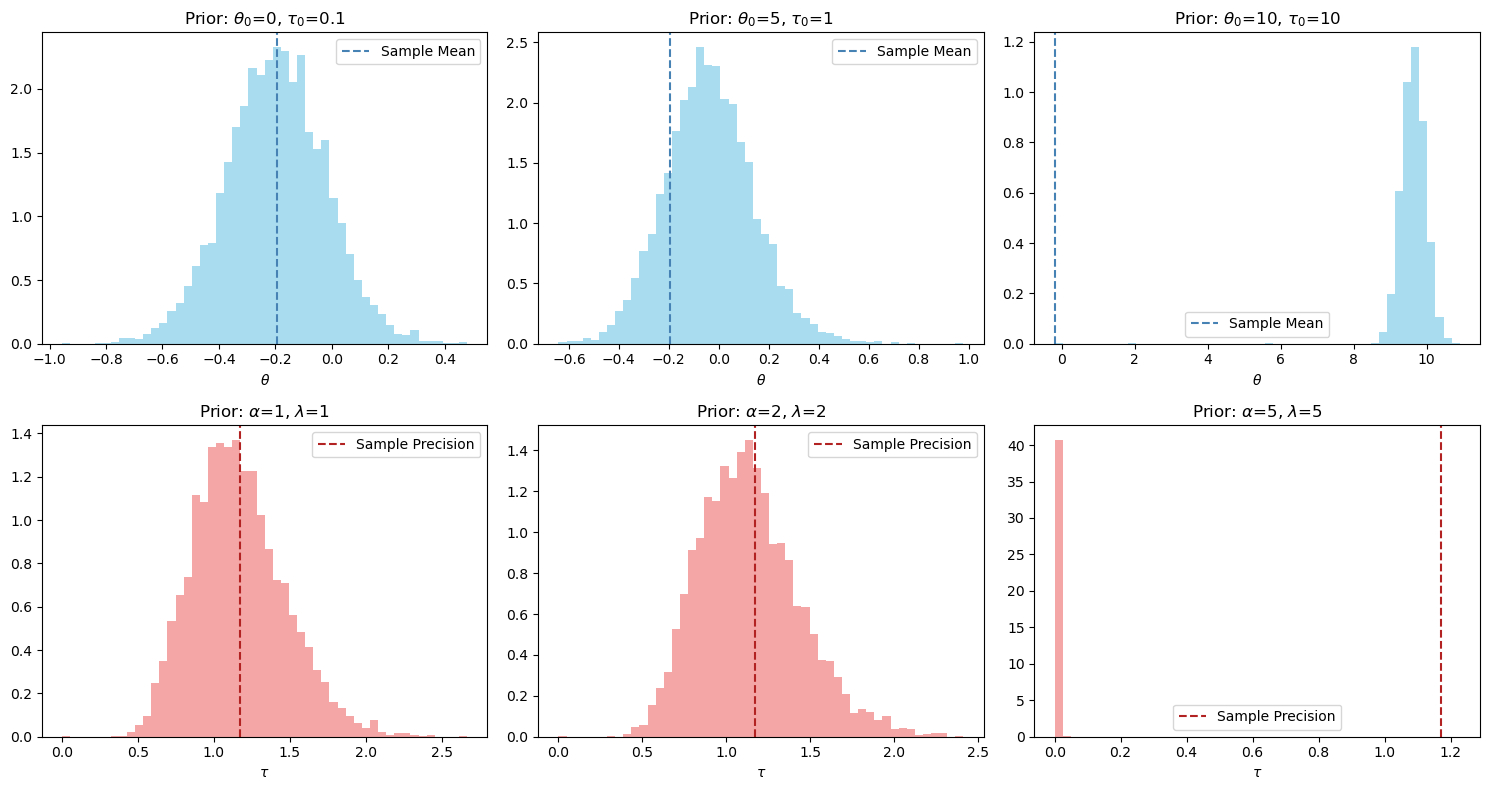

In [16]:
fig, axes = plt.subplots(2, len(priors), figsize=(15, 8))

for i, res in enumerate(results):
    prior = res["prior"]
    theta_samples = res["theta"]
    tau_samples = res["tau"]

    # plot posterior for theta
    axes[0, i].hist(theta_samples, bins=50, density=True, alpha=0.7, color='skyblue')
    axes[0, i].axvline(x.mean(), color='steelblue', linestyle='--', label='Sample Mean')
    axes[0, i].set_title(f"Prior: $\\theta_{0}$={prior['theta_0']}, $\\tau_{0}$={prior['tau_0']}")
    axes[0, i].set_xlabel("$\\theta$")
    axes[0, i].legend()

    # plot posterior for tau
    axes[1, i].hist(tau_samples, bins=50, density=True, alpha=0.7, color='lightcoral')
    axes[1, i].axvline(1/((np.std(x, ddof=1))**2), color='firebrick', linestyle='--', label='Sample Precision')
    axes[1, i].set_title(f"Prior: $\\alpha$={prior['alpha_prior']}, $\\lambda$={prior['lambda_prior']}")
    axes[1, i].set_xlabel("$\\tau$")
    axes[1, i].legend()

plt.tight_layout()
plt.show()

## Q3

*Read the following "conversation". My reactions to this initial text I was provied with are the colored font. Then either (A) provide an analagous derivation of this result for the multinomial-Dirichlet specification, or (B) just report that if the prior is a proper distribution then posterior is proportional to the joint distribution as Bayes Theorem tells us and describe how one might therefore identify the exact distribution of the posterior by just looking at the joint but that finally all this is moot and besides the point because as Bayesians we're going to trade any functional forms of distributions for samples from those distributions to just make histograms and belief (credible interval probability) statements based on those anyway...*

Suppose we have the following model setup:
\begin{align*}
    x_1,...,x_n &\overset{iid}{\sim} \text{Bernoulli}(\theta)\\
    \theta &\sim \text{Beta}(a, b)
\end{align*}

The joint likelihood distribution of ~~x_1,...,x_n~~ <span style='color:red'> $\sum_i x_i$</span> $| \theta$ is $\text{Binomial}(n, \theta)$. Now, let's consider the posterior:
\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{p(x_1,...,x_n)} = \color{red}{\frac{p(\mathbf{x} | \theta)p(\theta)}{p(\mathbf{x})}}\\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} = \color{red}{\frac{p(\mathbf{x}| \theta)p(\theta)}{\int p(\mathbf{x} | \theta )p(\theta) d\theta}}
\end{align*}

We can directly calculate the above if the denominator is finite. We tend to use proportionality arguments in this class, but to build some intuition <span style='color:red'>Bayes theorem is $p(\theta | \mathbf{x}) = \frac{p(\mathbf{x} | \theta )p(\theta)}{p(x)}$ and (if we know $\mathbf{x}$) then $p(\mathbf{x})$ is a constant so we must gather all $\theta$ related terms in our mathematical expression (dropping anything else which is any other constant) and see if we know of any statistical distribution that when scaled by a constant could exactly replicate our math as a function of $\theta$</span>, <span style='color:blue'>but if by "intuition" you mean the next 10 lines of derivation because you refuse to believe that the posterior is proportional to the joint (for proper priors) as Bayes Theorem claims</span> let's formally calculate that integral for the Beta-Binomial problem:

$\scriptsize
\begin{align*}
    \int p(\overset{\color{red}{\textrm{You meant } \sum_i x_i}}{x_1,...,x_n} | \theta )p(\theta) d\theta &= \int_0^1 \color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\int_0^1 \theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\int_0^1 \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a - 1}(1-\theta)^{n-\sum_i x_i + b - 1}d\theta \\
    &= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}\\& \text{ (because we have written the density formula above, which integrates to } 1)\\    
  & \color{blue}{\textrm{(But why stop there shouldn't we prove the integral is equal to 1 for "intuition"?)}}\\
    & \color{red}{\textrm{(if "intuition" may assume a density has area 1 then prove or believe Bayes Theorem)}}\\
    & \color{purple}{\textrm{Proof: $p(\theta|\mathbf{x})p(\mathbf{x}) = p(\mathbf{x}|\theta)p(\theta) \Rightarrow p(\theta|\mathbf{x}) = \frac{p(\mathbf{x}|\theta)p(\theta)}{p(\mathbf{x})}$}} \\    
    & \color{green}{\textrm{(Bayes Theorem is the formula for a posterior distribution if the prior is proper)}}\\
    & \color{blue}{\textrm{(If you believe it then the posterior is proportional to the joint and must have area 1)}}\\
    & \color{red}{\textrm{(Can you recognize what distribution for $\theta$ would be proportional to the given joint?)}}\\
    & \color{green}{\textrm{(There's only gonna be one... can't be two... can you find one distribution that does it?)}}\\
\end{align*}$

Now, we can directly plug in to our Bayes formula to directly calculate the posterior:

$\begin{align*}
    p(\theta | x_1,...,x_n) &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\int p(x_1,...,x_n | \theta )p(\theta) d\theta} \\
    &= \frac{p(x_1,...,x_n | \theta)p(\theta)}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}} \overset{\color{blue}{\textrm{just this alone is a Bernoulli likelihood}}}{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i}} \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\color{red}{\overset{\textrm{erroneous}}{\begin{pmatrix}
        n \\ \sum_i x_i
    \end{pmatrix}}}\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\theta^{\sum_i x_i}(1-\theta)^{n-\sum_i x_i} \theta^{a-1}(1-\theta)^{b-1}}{\frac{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}{\Gamma(a+b+n)}} \\
    &= \frac{\Gamma(a+b+n)}{\Gamma(a+ \sum_i x_i)\Gamma(b + n - \sum_i x_i)}\theta^{\sum_i x_i + a-1}(1-\theta)^{n-\sum_i x_i+b-1} \\
    &= \text{Beta}(a+ \sum_i x_i, b + n - \sum_i x_i)
\end{align*}$

<span style='color:blue'>
So the structure of this "proof" providing the right kind of "intution" you'll apparently need to feel comfortable and safe about proportionality if believing that the posterior is proportional to the joint as Bayes Theorem claims is a step too far is...</span>

$\color{green}{\require{cancel}
\begin{align}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}} &={} \frac{\cancel{c_xc_\theta} c p(\boldsymbol{\theta}|\textbf{x})}{\cancel{c_xc_\theta} \int c p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}\\
&={} \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \int \xcancel{\frac{1}{c} c} p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}} =  \frac{c p(\boldsymbol{\theta}|\textbf{x})}{ c \cancel{\int p(\boldsymbol{\theta}|\textbf{x})d \boldsymbol{\theta}}^1} = \frac{\xcancel{c} p(\boldsymbol{\theta}|\textbf{x})}{ \xcancel{c} } = p(\boldsymbol{\theta}|\textbf{x})\\
\end{align}}
$

<span style='color:blue'>
Or here's an even more direct way to show this...
</span>

$\color{red}{
\begin{align*}
\frac{p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int p(\textbf{x}|\boldsymbol{\theta})p(\boldsymbol{\theta}) d\boldsymbol{\theta}}
 &={} \frac{p(\boldsymbol{\theta}|\textbf{x})p(\textbf{x})}{p(\textbf{x})} \\
  &={} p(\boldsymbol{\theta}|\textbf{x})
\end{align*}}
$    



We can see that when we have ~~**conjugate** priors (where the prior and posterior have the same form)~~ <u>**just any (propor) prior**</u>, the denominator in Bayes rule amounts to any normalizing constants in the likelihood and prior (that allow for the densities to integrate to 1 times the inverse of the equivalent normalizing constant of the posterior. Once we plug this back in to Bayes formula and cancel and rearrange terms, this amounts to multiplying the normalizing constant of the posterior with the portion of the posterior that relies on the parameter. This sort of derivation isn't unique to conjugate priors; as long as we can recognize the family in which the product of the prior and likelihood belong to, the integral in the denominator can be solved by simplifying the term in the integral to the precise density (which occurs by moving normalizing constants outside of the integral, and introducing the normalizing constant for that new density). This is the technique we used to solve the integral above.

As a result, we can use a proportionality argument to skip all of these mathematical derivations. If we can recognize the functional form of the product between the likelihood and prior as being in the family of another probability distribution, then that is equivalent to moving around these normalizing constants to simplify integrals.



## Answer to Q3 (Completing B)

If the prior is a proper distribution, then the posterior will also be proportional to the joint distribution, as given by Bayes' Theorem. We can identify the exact distribution of the posterior by looking at the joint distribution; however, this is besides the point as Bayesian analysts will trade any functional forms of distributions for samples from those distributions. From those samples, they will create histograms and belief statements with credible interval probabilities. 
